In [1]:
from chromo.models import (
    DpmjetIII193,
    Phojet112,
    Sibyll23d,
)
from chromo.kinematics import CenterOfMass, GeV
import boost_histogram as bh


In [2]:

kin = CenterOfMass(1000 * GeV, "p", "p")

nevents = 10000

models = [Sibyll23d, Phojet112, DpmjetIII193]
h = bh.Histogram(
    bh.axis.Regular(20, -10, 10),
    bh.axis.IntCategory([], growth=True),
    bh.axis.Integer(0, len(models)),
)
mnames = []
for iModel, Model in enumerate(models):
    m = Model(kin, seed=1)
    mnames.append(m.name + " " + m.version)
    for event in m(nevents):
        fs = event.final_state()
        h.fill(fs.eta, fs.pid, iModel)

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..
1

                                                     
       ----      PHOJET ver

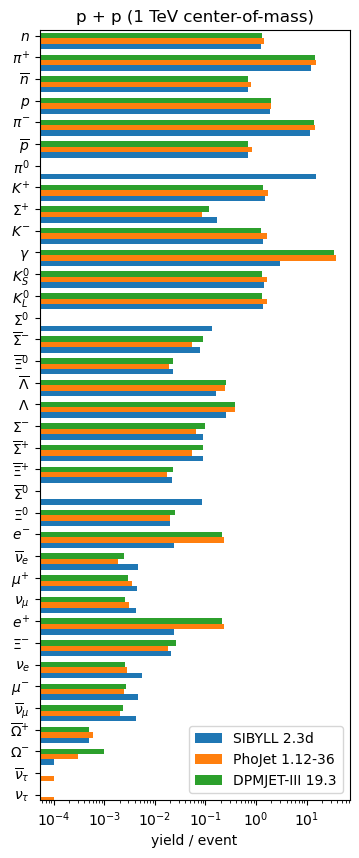

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from particle import Particle

y = -np.arange(len(h.axes[1]))
plt.figure(figsize=(4, 10))
for im, mn in enumerate(mnames):
    plt.barh(-0.5 + y + im*0.25, h[sum, :, im].values() / nevents, label=mn, height=0.25)
plt.yticks(y, (f"${Particle.from_pdgid(x).latex_name}$" for x in h.axes[1]))
plt.semilogx()
plt.legend()
plt.xlabel("yield / event")
plt.ylim(y[-1] - 0.25, y[0] + 0.25)
plt.title("p + p (1 TeV center-of-mass)");